In [1]:
from sklearn.datasets import load_wine
import pandas as pd
# Read the wine dataset 
dataset = load_wine() 
df = pd.DataFrame(data=dataset['data'], columns=dataset['feature_names']) 
df = df.assign(target=pd.Series(dataset['target']).values)

c:\Users\amits\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Filter the irrelevant columns 
df = df[['alcohol', 'magnesium', 'target']] 
# Filter the irrelevant label 
df = df[df.target != 0]

In [3]:
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(df, test_size=30, random_state=3)

## q1

In [4]:
import matplotlib.pyplot as plt

def display_scatter(df, title):
    winery_1 = df[df['target'] == 1]
    plt.scatter(winery_1['alcohol'], winery_1['magnesium'], c='mediumslateblue', label='Winery 1')
    winery_2 = df[df['target'] == 2]
    plt.scatter(winery_2['alcohol'], winery_2['magnesium'], c='limegreen', label='Winery 2')

    plt.xlabel('Alcohol')
    plt.ylabel('Magnesium', rotation='horizontal', labelpad=30)
    plt.title('Wineries alcohol and magnesium distribution\nfor ' + title)
    plt.legend()
    plt.show()


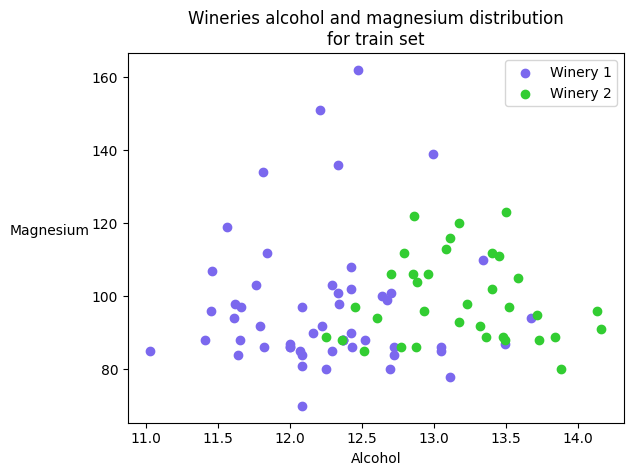

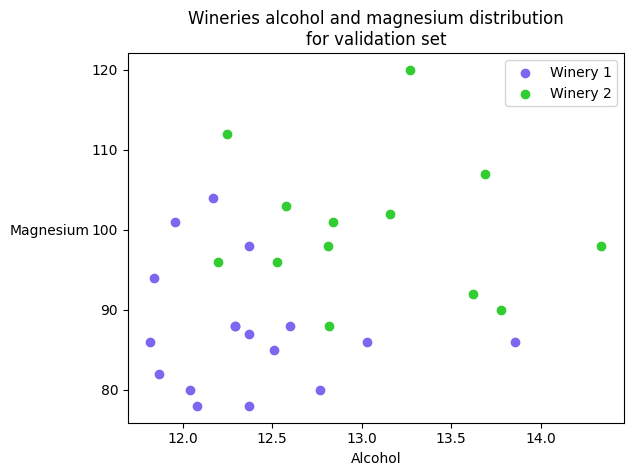

In [5]:
display_scatter(train_df, 'train set')
display_scatter(val_df, 'validation set')

From the above train plot we can infer that the train data is not linearly seperable, hence the Hard SVM algorithm will fail and has no solution.

## Q2

In [6]:
import numpy as np

def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=70, linewidth=1.5, facecolors='none',cmap='coolwarm', edgecolor='black');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


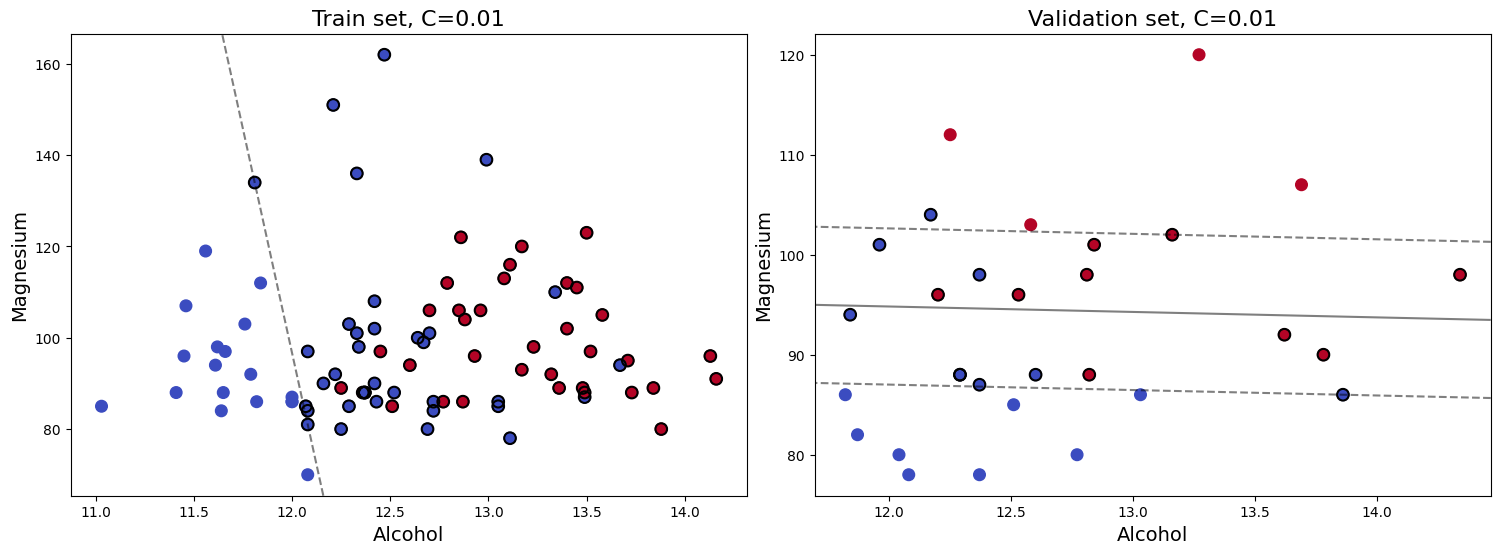

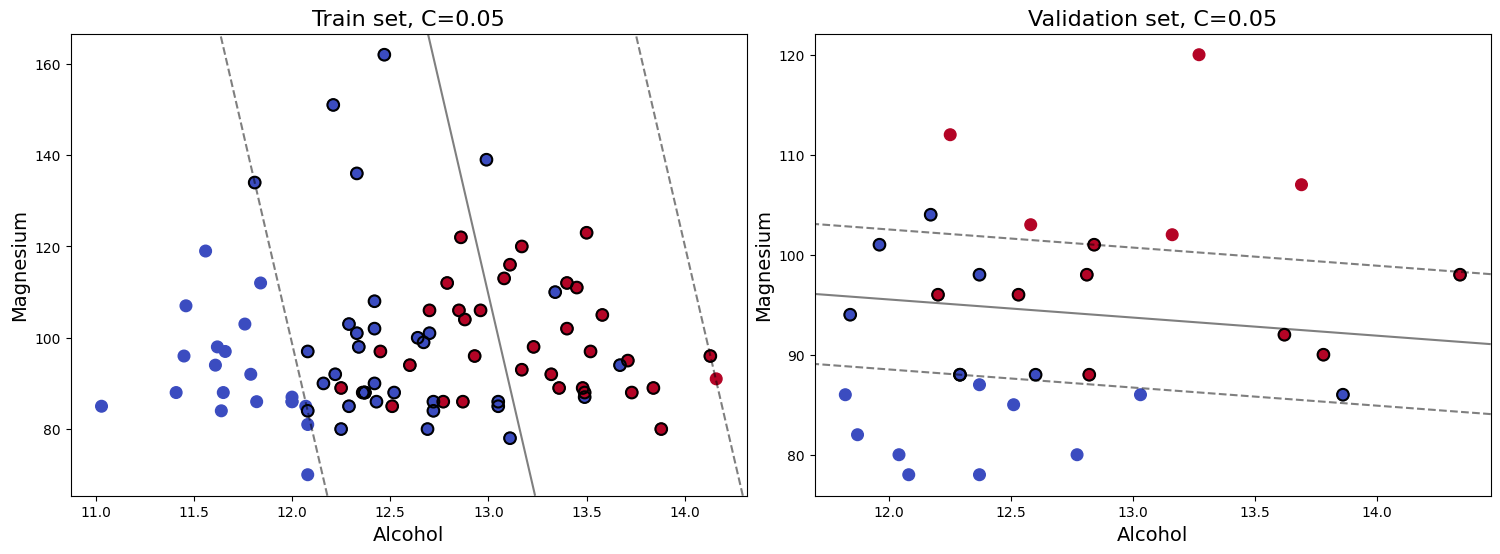

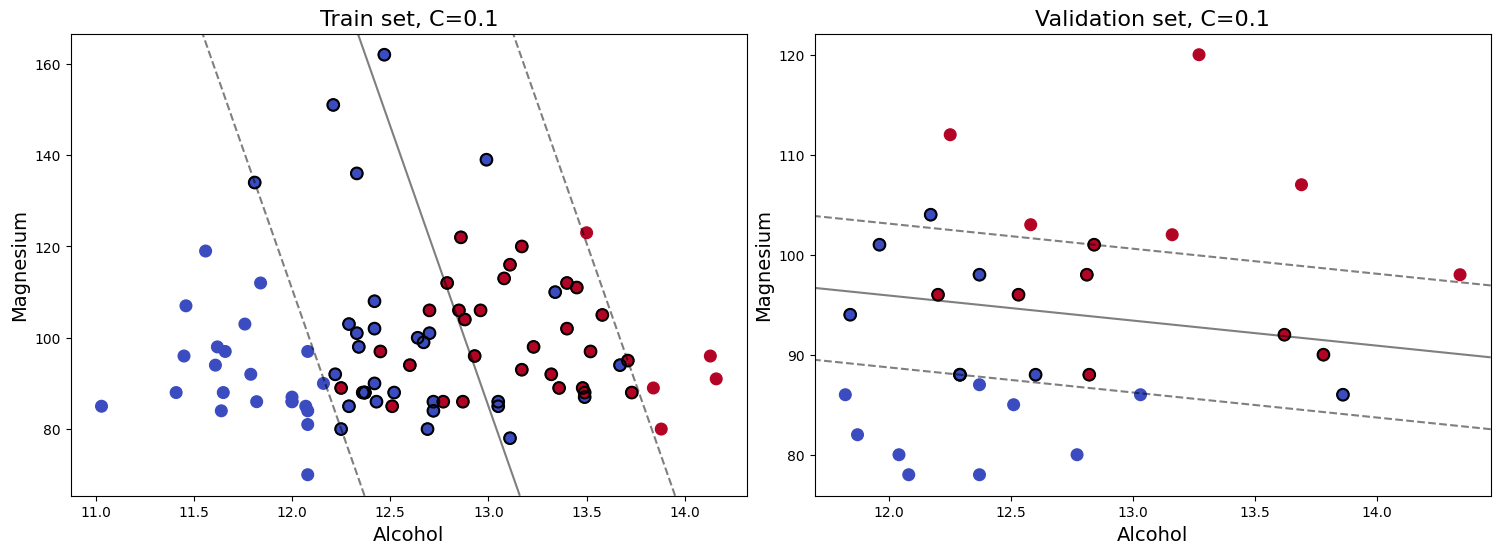

In [7]:
from sklearn.svm import SVC

def plot_svm(c, X, y, ax=None, kernel='linear', deg=None):
    model = SVC(kernel=kernel, C=c) if deg is None else SVC(kernel=kernel, degree=deg, C=c)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=70, cmap='coolwarm')
    plot_svc_decision_function(model, ax)

c_list = [0.01, 0.05, 0.1]

for c in c_list:
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

    plot_svm(c, train_df[['alcohol', 'magnesium']].values, train_df['target'].values, ax[0])
    ax[0].set_title('Train set, C=' + str(c), fontsize=16)
    ax[0].set_xlabel('Alcohol', fontsize=14)
    ax[0].set_ylabel('Magnesium', fontsize=14)

    plot_svm(c, val_df[['alcohol', 'magnesium']].values, val_df['target'].values, ax[1])
    ax[1].set_title('Validation set, C=' + str(c), fontsize=16)
    ax[1].set_xlabel('Alcohol', fontsize=14)
    ax[1].set_ylabel('Magnesium', fontsize=14)
plt.show()

## Q3
![צילום מסך 2024-02-19 200036.png](<attachment:צילום מסך 2024-02-19 200036.png>)
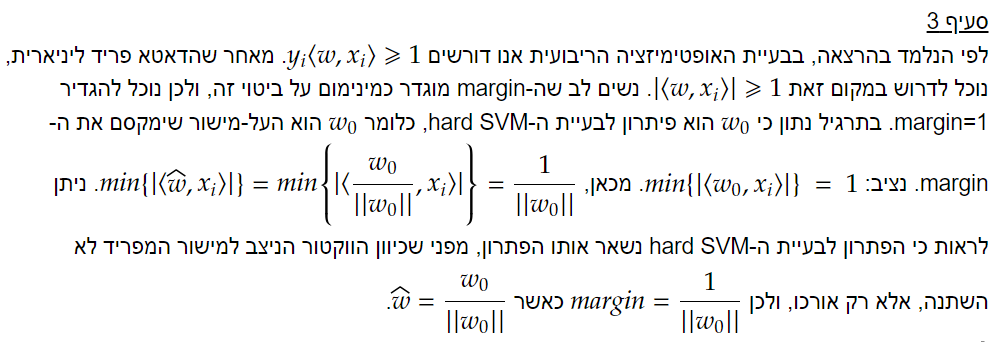

## Q4

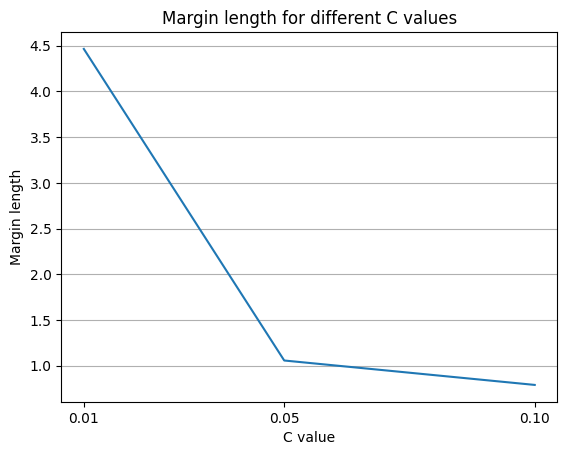

In [8]:
margins = list()
for c in c_list:
    model=SVC(kernel='linear', C=c)
    model.fit(train_df[['alcohol', 'magnesium']], train_df['target'])
    marg_len=1/np.linalg.norm(model.coef_[0])
    margins.append(marg_len)
plt.plot(c_list, margins)
plt.xticks(c_list)
plt.xlabel('C value')
plt.ylabel('Margin length')
plt.title('Margin length for different C values')
plt.grid(axis='y')
plt.show()

The graph above is monotonically decreasing, and we notice that it has a significant decrease between 0.01 and 0.05.

This supports the claim we saw in class: the larger C is, the smaller the train error is, and the narrower the margin is - and vice versa. This is because the C value multiplies the loss function of the train, and the larger C gets, the larger this multiplication is, and the train loss becomes more significant in the Soft-SVM function. On the other hand, the smaller C is, the multiplication be less significant than the norm squared of w, i.e the margin will be more significant in the Soft-SVM function.

## Q5

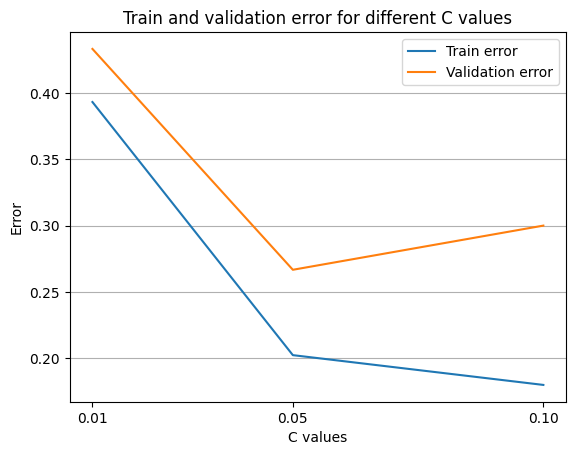

In [9]:
train_errors = list()
validation_errors = list()
for c in c_list:
    model = SVC(kernel='linear', C=c)
    model.fit(train_df[['alcohol', 'magnesium']], train_df['target'])
    train_errors.append(1-model.score(train_df[['alcohol', 'magnesium']], train_df['target']))
    validation_errors.append(1-model.score(val_df[['alcohol', 'magnesium']], val_df['target'])
)
    
plt.plot(c_list, train_errors, label='Train error')
plt.plot(c_list, validation_errors, label='Validation error')
plt.xticks(c_list)
plt.xlabel('C values')
plt.ylabel('Error')
plt.title('Train and validation error for different C values')
plt.legend()
plt.grid(axis='y')
plt.show()        
    

From the graph above, we can observe that the graphs are monotonically decreasing until c is 0.05. Between 0.05 and 0.1, we can observe that the error values for the validation set rise as c increases. We can explain this phenomenon with the fact that c regulizes the loss function. As c increases the margin length decreases (as we saw in the graph in Q4) at some point this creates overfitting on the train set, which results in underfitting on the validation set as studied in class.

## Q6

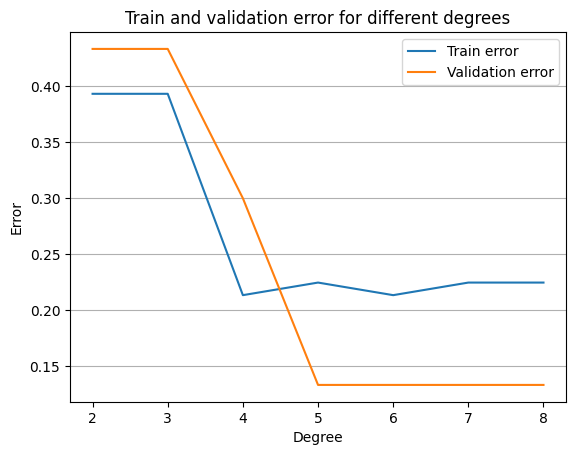

In [10]:
train_errors = list()
validation_errors = list()
degrees_list = np.arange(2, 9)

for d in degrees_list:
    model = SVC(kernel='poly', degree=d, C=1)
    model.fit(train_df[['alcohol', 'magnesium']], train_df['target'])
    train_errors.append(1-model.score(train_df[['alcohol', 'magnesium']], train_df['target']))
    validation_errors.append(1-model.score(val_df[['alcohol', 'magnesium']], val_df['target'])
)
    
plt.plot(degrees_list, train_errors, label='Train error')
plt.plot(degrees_list, validation_errors, label='Validation error')
plt.xticks(degrees_list)
plt.xlabel('Degree')
plt.ylabel('Error')
plt.title('Train and validation error for different degrees')
plt.legend()
plt.grid(axis='y')
plt.show()  

From the graph we observe that as the degree increases the error value of the validation set decrease, and in the higher degrees gets very close to 0.
We can explain this with the fact that we are mapping the data to a higher dimention, which makes the data more separable, because it is more flexible and capable of capturing complex patterns in the data.

## Q7
We choose degrees 2 and 6, because they receive the highest and lowest (respectivly) error values for both the train and validation set.

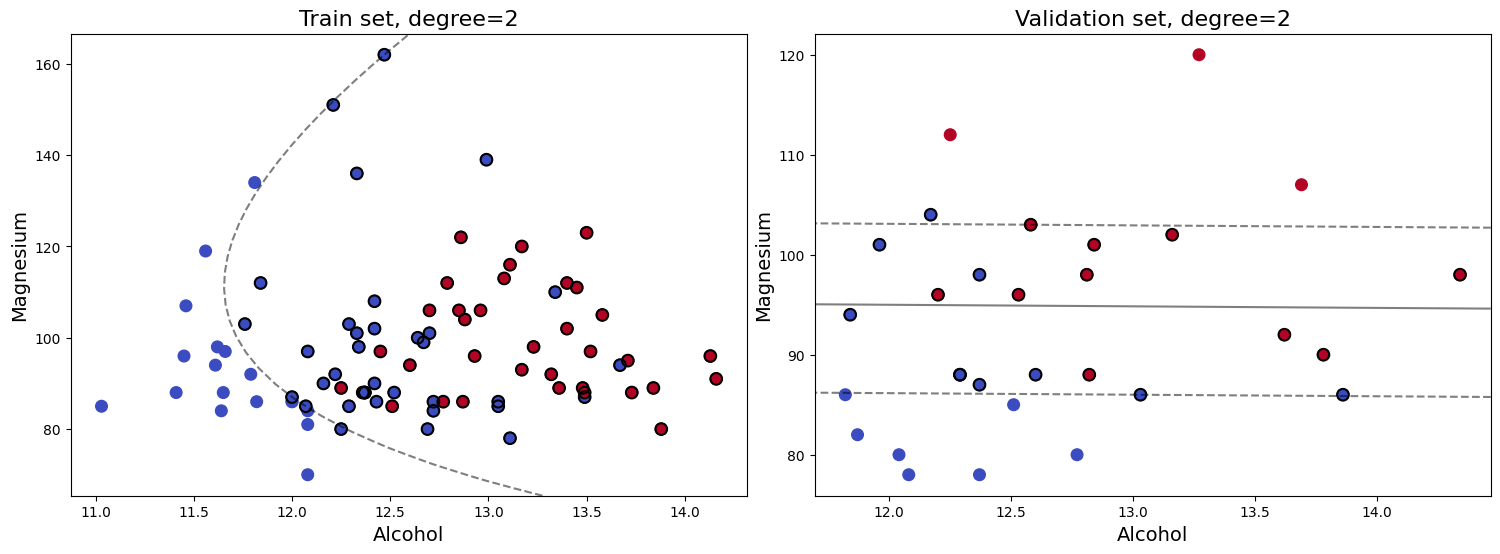

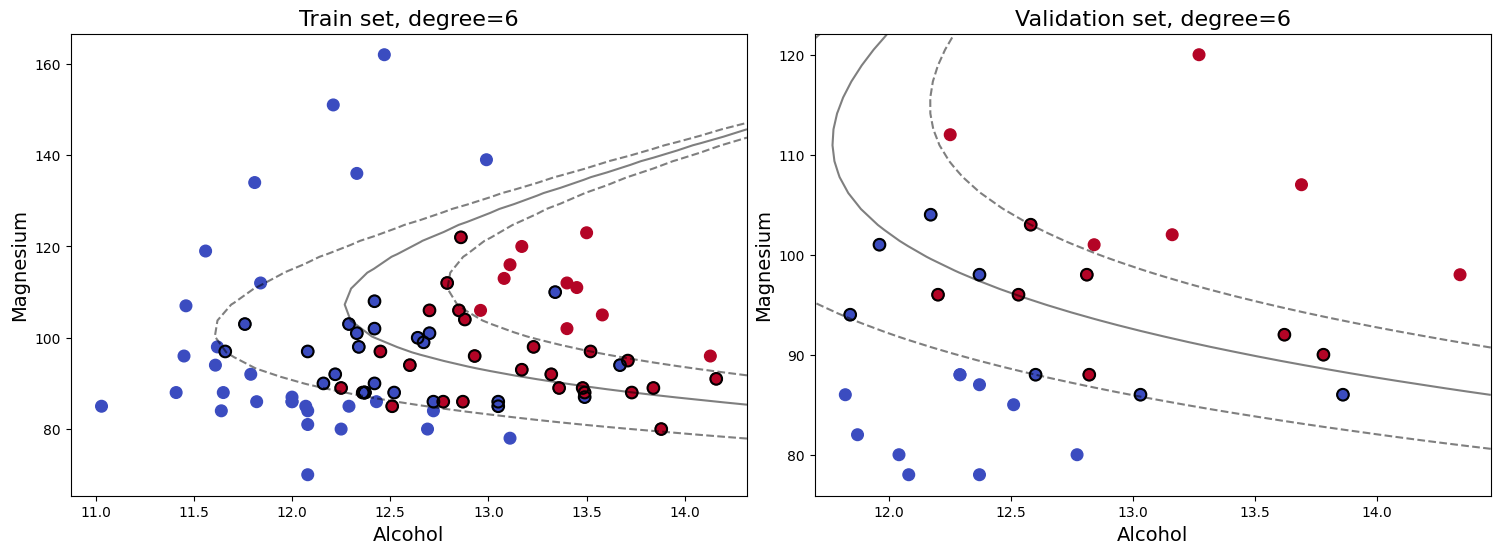

In [11]:
for d in [2, 6]:
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

    plot_svm(1, train_df[['alcohol', 'magnesium']].values, train_df['target'].values, ax[0], kernel='poly', deg=d)
    ax[0].set_title('Train set, degree=' + str(d), fontsize=16)
    ax[0].set_xlabel('Alcohol', fontsize=14)
    ax[0].set_ylabel('Magnesium', fontsize=14)

    plot_svm(1, val_df[['alcohol', 'magnesium']].values, val_df['target'].values, ax[1], kernel='poly', deg=d)
    ax[1].set_title('Validation set, degree=' + str(d), fontsize=16)
    ax[1].set_xlabel('Alcohol', fontsize=14)
    ax[1].set_ylabel('Magnesium', fontsize=14)